In [1]:
using Random
Random.seed!()


passLength,numMatchesForLog = 8,1
possibleChars=['a':'z' ; 'A':'Z' ; '0':'9'] #  a list of character


correctPassword ="3xyZu4vN"

numMatch(loginPassword)= sum([loginPassword[i]==correctPassword[i] for i in 1:passLength])

N=10^7

passwords = [String(rand(possibleChars,passLength)) for i in 1:N]
numLogs = sum([numMatch(p)>=numMatchesForLog for p in passwords])
println("Number of login attempts logged :", numLogs)
println("Proportion of login attempts logged:", numLogs/N)

Number of login attempts logged :1219043
Proportion of login attempts logged:0.1219043


Maximum Error   2.461172365062727820892938546467205715971256384764337390231064159958270652057059e-16


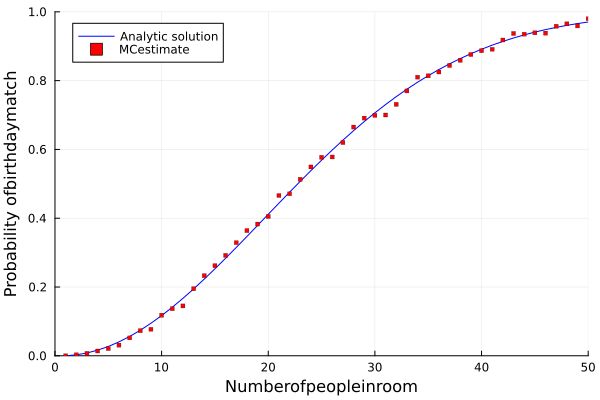

In [35]:
using StatsBase,Combinatorics,Plots;
                                 #product over a comprehensionj
matchExists1(n) = 1-prod([k/365 for k in 365:-1:365-n+1]) # fore ach possible combination
matchExists2(n)= 1-factorial(365,365-big(n))/365^big(n) #bigInt to prevent overflow

function bdEvent(n)
    birthdays=rand(1:365,n)
    dayCounts= counts(birthdays,1:365)
    return maximum(dayCounts)>1
end


probEst(n) = sum([bdEvent(n) for _ in 1:N])/N

xGrid=1:50
analyticSolution1= [matchExists1(x) for x in xGrid]
analyticSolution2= [matchExists2(x) for x in xGrid]
matchExists1
println("Maximum Error   ",(maximum(abs.(analyticSolution1-analyticSolution2))))

N=10^3
mcEstimates=[probEst(n) for n in xGrid]

plot(xGrid,analyticSolution1,c=:blue, label="Analytic solution")
scatter!(xGrid,mcEstimates, c=:red , ms=2, msw=0.3, shape=:square
,
 label="MCestimate", xlims=(0,50),ylims=(0,1),
  xlabel="Number of people in room",
 ylabel="Probability of Birthday match",
 legend=:topleft)

In [3]:
import Pkg; Pkg.add("Combinatorics")

    Updating registry at `C:\Users\PC\.julia\registries\General.toml`
   Resolving package versions...
   Installed Combinatorics ─ v1.0.2
    Updating `C:\Users\PC\.julia\environments\v1.10\Project.toml`
  [861a8166] + Combinatorics v1.0.2
    Updating `C:\Users\PC\.julia\environments\v1.10\Manifest.toml`
  [861a8166] + Combinatorics v1.0.2
Precompiling project...
  ✓ Combinatorics
  1 dependency successfully precompiled in 5 seconds. 174 already precompiled.


# Lattice Path
pg 62 pdf
Lattice Path describesa trajectory of the ant going from south west point,(0,0) to north east,(N,N).
                let Event B= All possible lattice paths since B is finite, 
                        it is denoted as
                        |B| = (2N)C(N) =(2N)!/(N!)^2 
 which because of the ants needs to take 2n steps to reach (N,N) which n steps to the north whiel n steps to the east, which it is binomal coefficien.

            let Event A= all lattice paths where at any point
            the ant has not taken more easterly steps than northerly steps which
            |A| = ((2N)/(CN) =(2N)!/(N!)^2)/(N+1)
            which is called the n'th Catalan Number n.
            

 So, What is the chance that ant stays on or above the diagonal throught the jorney from (0,0) to (n,n)

which depedns on probability function/measure
    Model I: Assume a symmetric probabilty space
              eahc lattice path is equally likely which obtaining the probabilities and obtaining the combinatorial expression
              P I (A) =|A|/|B| =1/(n+1)
    Model II : At each grid interseciton, the ant could go ('east' or 'north')
                which can go either east or norht with equal probability 1/2, 
                if there is no option, it will continues on the border until arrive at final destionation(n,n), which considering a recurrence relation for the probabilities
                P I (A) =|A|/|B| =((2N-1)C(N))/2^(2N-1) 

        which probability model would have different answer based on Model I and Model II based on a value N.
                

In [18]:
using Random, Combinatorics, Plots,LaTeXStrings; 
Random.seed!(12)

n,N = 5,10^5
# the function to check if a path is an upper alttice path by summing
#all the odd partial sums and returning false
function isUpperLattice(v)
    for i in 1:Int(length(v)/2)
        sum(v[1:2*i-1])>=i ? continue : return false
    end 
    return true
end
omega= unique(permutations([zeros(Int,n);ones(Int,n)]))
A = omega[isUpperLattice.(omega)] # is applied to each element of omega via '.' operator
pA_modelI=length(A)/length(omega)


# model 2
function randomWalkPath(n)
    x,y= 0,0
    path=[]
    while x<n && y<n
        if rand()<0.5
            x+=1
            push!(path,0)
        else
            y+=1
            push!(path,1)
        end
    end
    append!(path, x<n ? zeros(Int64,n-x) : ones(Int64,n-y))
    return path
end

pA_modelIIest=sum([isUpperLattice(randomWalkPath(n)) for _ in 1:N])/N
println("ModelI:",pA_modelI,"\tModelII:",pA_modelIIest)

ModelI:0.16666666666666666	ModelII:0.24677


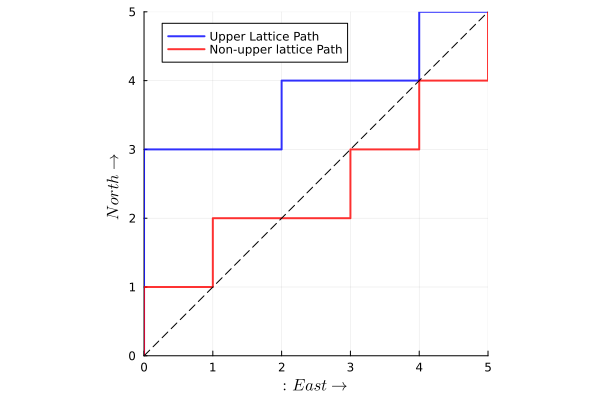

In [27]:
function plotPath(v,l,c)
    x,y=0,0
    graphX,graphY = [x],[y]
    for i in v
        if i==0
            x+=1
        else 
            y+=1
        end
        push!(graphX,x),push!(graphY,y)
    end
    plot!(graphX,graphY, la=0.8,lw=2,label=l,c=c,
    ratio=:equal,legend=:topleft, xlims=(0,n),ylims=(0,n),
    xlabel=L":East\rightarrow",ylabel= L"North\rightarrow")

end
plot()
plotPath(rand(A),"Upper Lattice Path",:blue) # choose a random path
plotPath(rand(setdiff(omega,A)),"Non-upper lattice Path",:red)#setdiff to determine the collection of non upperlattice paths
plot!([0,n],[0,n],ls=:dash,c=:black,label="")


        

function plotPath(v,1,c)
x,y=0,0
graphX,graphY = [x],[y]
for i in v
    if i==0